In [117]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

### Load data

In [133]:
banana = pd.read_csv("company_attrition.csv")

### Determine age from date of birth

In [134]:
def age(born):
    born_split = born.split("/")
    born_split[-1] = "19" + born_split[-1]
    born = ""
    for b in born_split:
        born += "{}/".format(b)
    born = born[:-1]
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
banana['Age'] = banana['DOB'].apply(age)

# First seven

In [135]:
banana.head(7)

,EmpID,Gender,Relationship,Department,DOB,Age,Citizenship,SatisfactionScore,PerformanceScore,Termd,PayRate
0,1103024456,F,Married,Sales,11/24/87,34,US Citizen,1,3,1,28.50
1,1106026572,M,Divorced,Sales,4/26/84,38,US Citizen,1,3,0,23.00
2,1302053333,M,Single,Sales,9/1/86,35,US Citizen,1,3,0,29.00
3,1211050782,F,Married,Sales,9/16/85,36,US Citizen,1,3,0,21.50
4,1307059817,F,Single,Sales,5/19/88,33,US Citizen,1,3,0,16.56
5,711007713,F,Married,Finance & Business Operations,6/14/87,34,US Citizen,1,3,1,20.50
6,1504073368,F,Married,Finance & Business Operations,6/1/64,57,Eligible NonCitizen,6,3,0,55.00


### Bottom 3 records

In [10]:
banana.tail(3)

,EmpID,Gender,Relationship,Department,DOB,Age,Citizenship,SatisfactionScore,PerformanceScore,Termd,PayRate
307,904013591,M,Married,Human Resources,2/9/83,39,US Citizen,3,3,0,53.8
308,1308060959,M,Single,Sales,9/9/65,56,US Citizen,3,3,0,53.0
309,1301052347,F,Widowed,Sales,5/2/78,43,US Citizen,3,3,0,55.2


## Sorting

In [136]:
banana.sort_values("EmpID", ascending=False, inplace=True)

In [12]:
banana.head()

,EmpID,Gender,Relationship,Department,DOB,Age,Citizenship,SatisfactionScore,PerformanceScore,Termd,PayRate
67,1988299991,F,Separated,Sales,4/16/81,41,US Citizen,3,3,0,39.0
120,1599991009,M,Single,Sales,9/8/77,44,US Citizen,5,3,0,15.0
6,1504073368,F,Married,Finance & Business Operations,6/1/64,57,Eligible NonCitizen,6,3,0,55.0
20,1504073313,M,Married,Sales,7/7/75,46,US Citizen,6,3,0,55.0
184,1503072857,F,Divorced,Sales,3/22/66,56,US Citizen,5,3,0,21.0


### Find 15th item in department

In [13]:
_15th_value = banana.iloc[14]["Department"]
_15th_value

'Sales'

### Second value of Relationship

In [87]:
_2nd_value = banana.iloc[1]["Relationship"]
_2nd_value

'Single'

In [15]:
filtered = banana[["Gender", "Relationship", "Department"]]
filtered = filtered.iloc[4:11]
filtered

,Gender,Relationship,Department
184,F,Divorced,Sales
31,M,Separated,Sales
213,F,Married,Finance & Business Operations
74,M,Divorced,Sales
198,F,Married,Sales
29,F,Single,Sales
91,M,Married,Sales


In [17]:
banana.query("SatisfactionScore > 5")["SatisfactionScore"].unique()

array([6], dtype=int64)

In [18]:
banana.query("PerformanceScore < 2")["PerformanceScore"].unique()

array([1], dtype=int64)

In [19]:
min_age = banana["Age"].min()
min_age

29

In [20]:
max_age = banana["Age"].max()
max_age

71

In [21]:
min_payrate = banana["PayRate"].min()
min_payrate

14.0

In [22]:
max_payrate = banana["PayRate"].max()
max_payrate

80.0

In [23]:
termd_employees = banana.query("Termd == 1")
termd_employees

,EmpID,Gender,Relationship,Department,DOB,Age,Citizenship,SatisfactionScore,PerformanceScore,Termd,PayRate
283,1499902910,M,Divorced,Sales,8/16/84,37,US Citizen,6,2,1,56.00
231,1411071324,M,Married,Finance & Business Operations,10/12/64,57,US Citizen,5,1,1,29.00
108,1411071212,M,Divorced,Sales,9/29/69,52,US Citizen,5,4,1,16.00
87,1410071026,F,Married,Finance & Business Operations,11/14/55,66,US Citizen,5,3,1,33.50
160,1410070998,F,Single,Human Resources,6/6/68,53,US Citizen,5,2,1,20.00
157,1409070245,F,Single,Finance & Business Operations,5/30/68,53,US Citizen,5,3,1,14.00
179,1408069635,F,Separated,Research & Development,10/30/69,52,US Citizen,5,3,1,20.00
254,1408069503,M,Single,Research & Development,12/3/76,45,US Citizen,5,3,1,26.00
45,1406068403,M,Divorced,Sales,7/4/88,33,US Citizen,3,4,1,35.50
222,1405067501,F,Married,Finance & Business Operations,4/3/75,47,Non-Citizen,5,3,1,15.00


In [25]:
us_employees = banana.query("Citizenship == 'US Citizen'")
us_employees

,EmpID,Gender,Relationship,Department,DOB,Age,Citizenship,SatisfactionScore,PerformanceScore,Termd,PayRate
67,1988299991,F,Separated,Sales,4/16/81,41,US Citizen,3,3,0,39.0
120,1599991009,M,Single,Sales,9/8/77,44,US Citizen,5,3,0,15.0
20,1504073313,M,Married,Sales,7/7/75,46,US Citizen,6,3,0,55.0
184,1503072857,F,Divorced,Sales,3/22/66,56,US Citizen,5,3,0,21.0
31,1502072711,M,Separated,Sales,1/15/68,54,US Citizen,6,4,0,55.0
...,...,...,...,...,...,...,...,...,...,...,...
5,711007713,F,Married,Finance & Business Operations,6/14/87,34,US Citizen,1,3,1,20.5
129,710007555,F,Separated,Sales,12/5/74,47,US Citizen,5,3,0,17.0
216,710007401,F,Married,Finance & Business Operations,12/8/73,48,US Citizen,5,3,0,22.0
166,706006285,M,Single,Sales,11/15/82,39,US Citizen,5,3,0,21.0


## Descriptive statistics

In [26]:
banana.describe()

,EmpID,Age,SatisfactionScore,PerformanceScore,Termd,PayRate
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000
mean,1.199745e+09,42.722581,4.606452,2.983871,0.093548,31.284806
std,1.829600e+08,8.927276,1.082349,0.577124,0.291670,15.383615
min,6.020003e+08,29.000000,1.000000,1.000000,0.000000,14.000000
25%,1.101024e+09,35.250000,5.000000,3.000000,0.000000,20.000000
50%,1.203032e+09,41.000000,5.000000,3.000000,0.000000,24.000000
75%,1.378814e+09,48.000000,5.000000,3.000000,0.000000,45.315000
max,1.988300e+09,71.000000,6.000000,4.000000,1.000000,80.000000


### CORRELATION SatisfactionScore and PerformanceScore

In [27]:
satisfaction_performance = banana[["SatisfactionScore", "PerformanceScore"]]
satisfaction_performance.corr(method="pearson")

,SatisfactionScore,PerformanceScore
SatisfactionScore,1.000000,-0.072365
PerformanceScore,-0.072365,1.000000


### DISTRIBUTION OF GENDER

In [28]:
banana['Gender'].value_counts().describe()

count      2.000000
mean     155.000000
std       31.112698
min      133.000000
25%      144.000000
50%      155.000000
75%      166.000000
max      177.000000
Name: Gender, dtype: float64

### CORRELATION AGE AND PAYRATE

In [29]:
age_pay = banana[["Age", "PayRate"]]
age_pay.corr(method="pearson")

,Age,PayRate
Age,1.000000,0.015467
PayRate,0.015467,1.000000


## GRAPHS

In [40]:
corr = banana.corr()
corr.style.background_gradient(cmap='coolwarm')

,EmpID,Age,SatisfactionScore,PerformanceScore,Termd,PayRate
EmpID,1.000000,0.161402,0.192228,-0.019210,0.049055,-0.020310
Age,0.161402,1.000000,0.101201,0.073877,0.110673,0.015467
SatisfactionScore,0.192228,0.101201,1.000000,-0.072365,-0.129035,-0.202810
PerformanceScore,-0.019210,0.073877,-0.072365,1.000000,0.008993,0.020695
Termd,0.049055,0.110673,-0.129035,0.008993,1.000000,-0.053474
PayRate,-0.020310,0.015467,-0.202810,0.020695,-0.053474,1.000000


In [137]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

In [138]:
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

C:\Users\USER\AppData\Local\Temp/ipykernel_7680/1439773376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
C:\Users\USER\AppData\Local\Temp/ipykernel_7680/1439773376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])


<AxesSubplot:title={'center':'Comparison between Satisfaction score and Performance score'}, xlabel='record', ylabel='Value'>

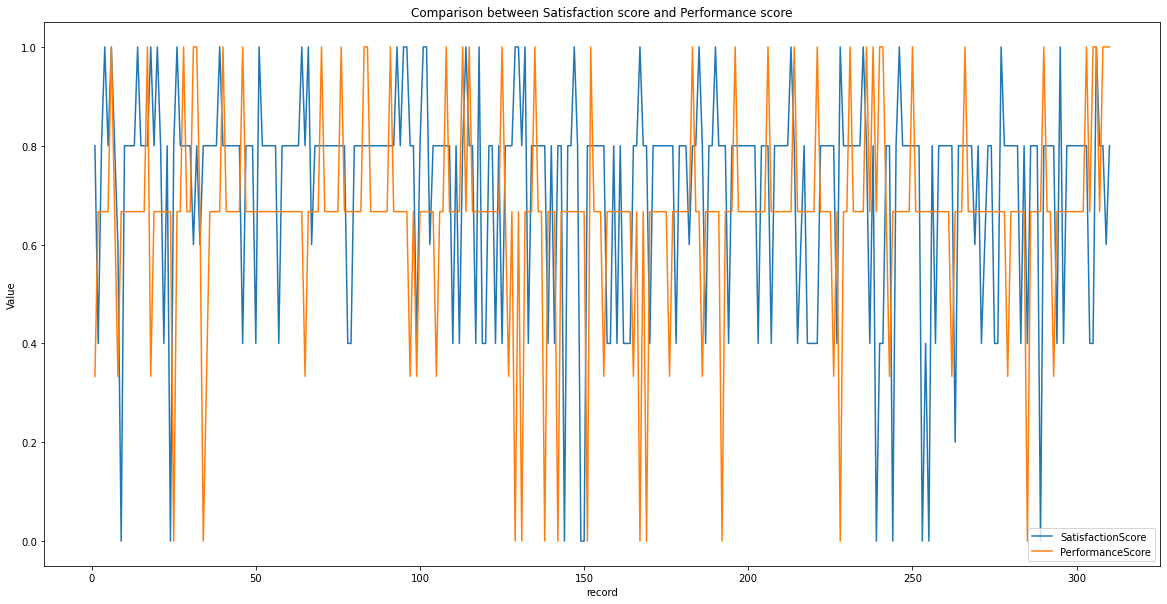

In [146]:
df = banana[["SatisfactionScore", "PerformanceScore"]]
df = scaleColumns(df, ["SatisfactionScore", "PerformanceScore"])
df.index = np.arange(1, len(df) + 1)
df.plot(figsize=(20, 10), ylabel="Value", xlabel="record", title="Comparison between Satisfaction score and Performance score")

C:\Users\USER\AppData\Local\Temp/ipykernel_7680/1439773376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
C:\Users\USER\AppData\Local\Temp/ipykernel_7680/1439773376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])


<AxesSubplot:title={'center':'Comparison between Agecore and PayRate'}, xlabel='record', ylabel='Value'>

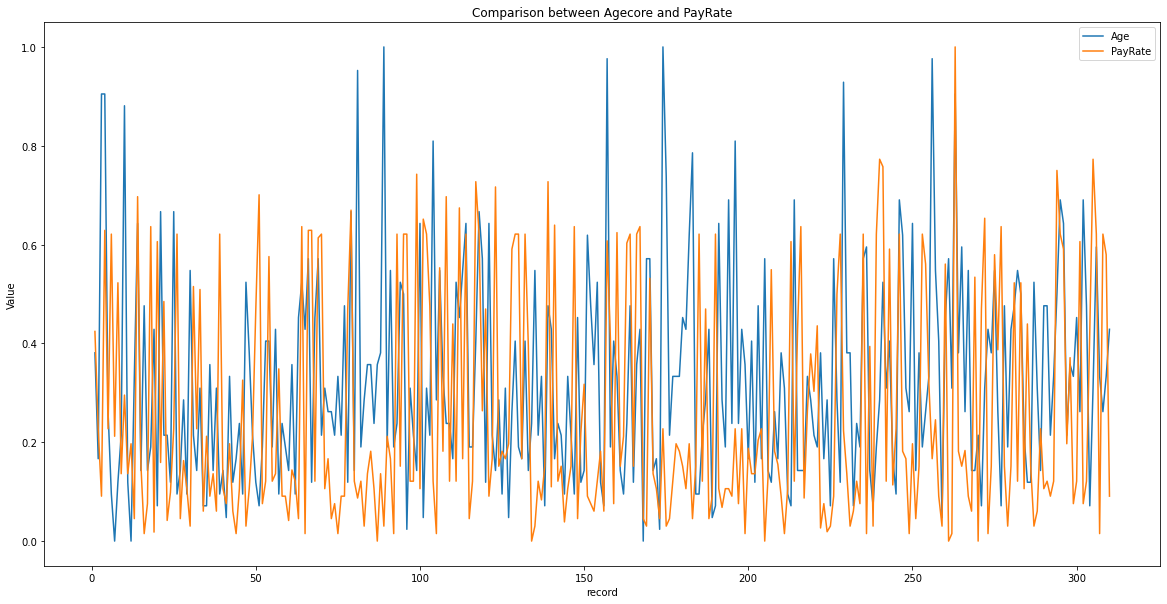

In [155]:
df = banana[["Age", "PayRate"]]
df = scaleColumns(df, ["Age", "PayRate"])
df.index = np.arange(1, len(df) + 1)
df.plot(figsize=(20, 10), ylabel="Value", xlabel="record", title="Comparison between Agecore and PayRate")

# Business Question AND REGRESSIONS

In [55]:
X = banana[["SatisfactionScore"]]
y = banana[["PayRate"]]

In [111]:
X = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PayRate   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     9.320
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           0.000118
Time:                        10:22:58   Log-Likelihood:                -1277.6
No. Observations:                 310   AIC:                             2561.
Df Residuals:                     307   BIC:                             2572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                42.4875      3.835     11.078      0.000      34.941      50.034
SatisfactionScore    -2.7992      0.788     -3.550      0.000      -4.351      -1.248
Gender                3.9427      1.721      2.290      0.023       0.555       7.330
==============================================================================
Omnibus:                       39.113   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.609
Skew:                           0.902   Prob(JB):                     1.25e-10
Kurtosis:                       2.475   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
banana["Gender"] = banana["Gender"].replace("M", 1)
banana["Gender"] = banana["Gender"].replace("F", 0)
X = banana[["SatisfactionScore", "Gender"]]
y = banana[["PayRate"]]

X = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PayRate   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     9.320
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           0.000118
Time:                        10:22:11   Log-Likelihood:                -1277.6
No. Observations:                 310   AIC:                             2561.
Df Residuals:                     307   BIC:                             2572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                42.4875      3.835     11.078      0.000      34.941      50.034
SatisfactionScore    -2.7992      0.788     -3.550      0.000      -4.351      -1.248
Gender                3.9427      1.721      2.290      0.023       0.555       7.330
==============================================================================
Omnibus:                       39.113   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.609
Skew:                           0.902   Prob(JB):                     1.25e-10
Kurtosis:                       2.475   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary Findings